In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
import _pickle as cPickle

train_images = cPickle.load(open("train_images.pkl","rb"))
train_labels = cPickle.load(open("train_labels.pkl","rb"))
test_images = cPickle.load(open("test_images.pkl","rb"))
test_labels = cPickle.load(open("test_labels.pkl","rb"))
val_images = cPickle.load(open("val_images.pkl","rb"))
val_labels = cPickle.load(open("val_labels.pkl","rb"))

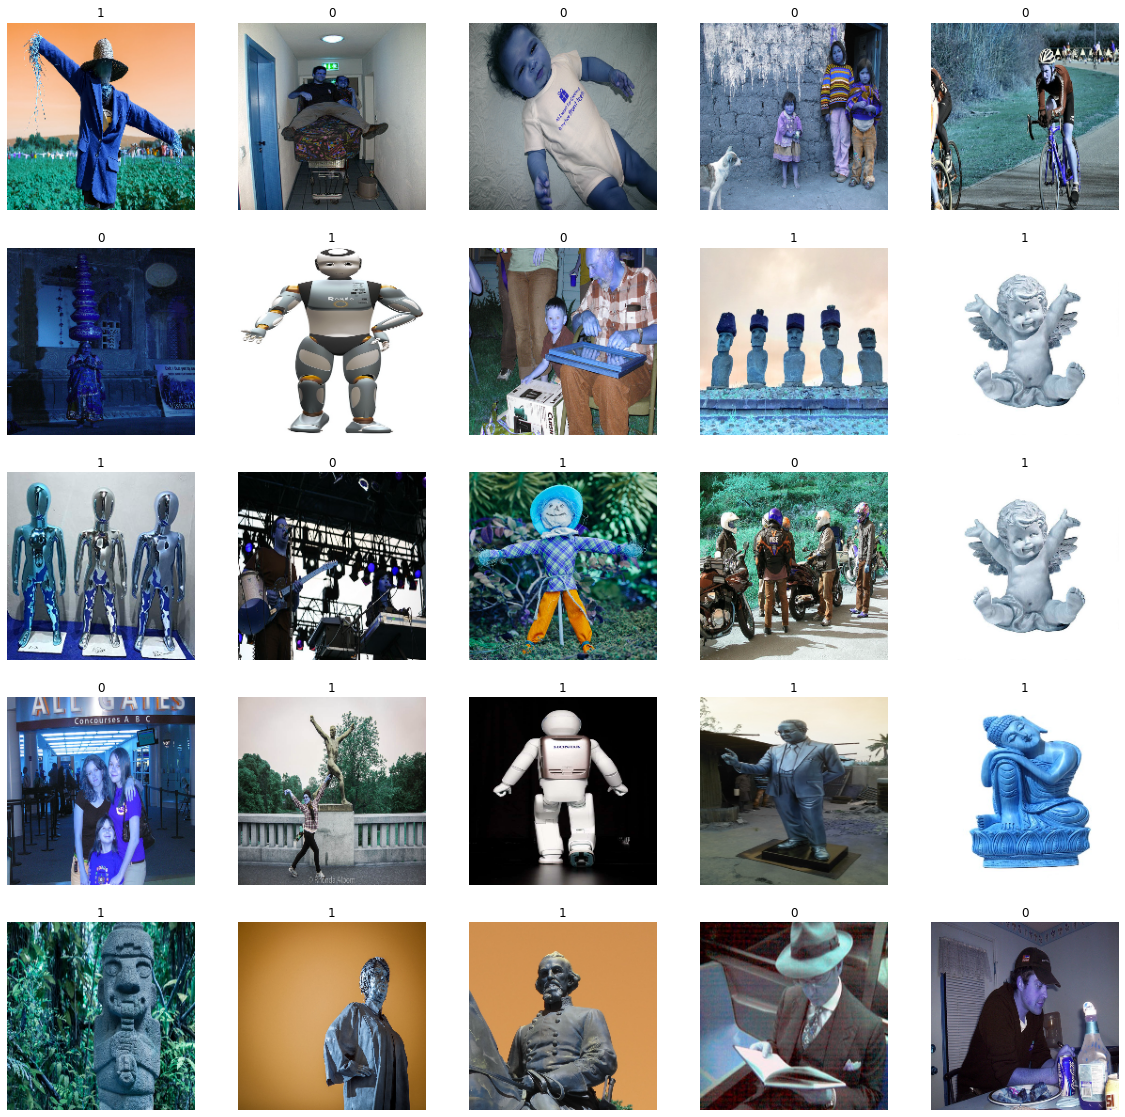

In [3]:
plt.figure(figsize=(20,20))
for n, i in enumerate(list(np.random.randint(0,len(train_images),25))): 
    plt.subplot(5, 5, n+1)
    plt.imshow(train_images[i])  
    plt.title(train_labels[i])
    plt.axis('off')

In [4]:
# Model 1 - 6.8.2022, trying first CNN

model = models.Sequential()

model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(2))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [5]:
history = model.fit(train_images, train_labels, epochs=6, 
                    validation_data=(val_images, val_labels))

Epoch 1/6
30/30 [==============================] - 26s 811ms/step - loss: 2.0897 - accuracy: 0.4974 - val_loss: 0.6651 - val_accuracy: 0.5312
Epoch 2/6
30/30 [==============================] - 29s 951ms/step - loss: 0.6316 - accuracy: 0.6563 - val_loss: 0.4920 - val_accuracy: 0.7937
Epoch 3/6
30/30 [==============================] - 26s 872ms/step - loss: 0.4618 - accuracy: 0.7937 - val_loss: 0.4317 - val_accuracy: 0.7750
Epoch 4/6
30/30 [==============================] - 29s 958ms/step - loss: 0.2305 - accuracy: 0.9218 - val_loss: 0.5019 - val_accuracy: 0.7375
Epoch 5/6
30/30 [==============================] - 23s 778ms/step - loss: 0.1369 - accuracy: 0.9571 - val_loss: 0.5678 - val_accuracy: 0.7250
Epoch 6/6
30/30 [==============================] - 24s 795ms/step - loss: 0.1558 - accuracy: 0.9634 - val_loss: 0.8813 - val_accuracy: 0.7375


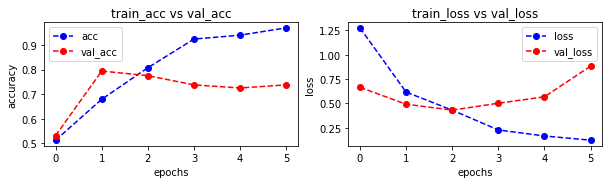

In [6]:
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

In [7]:
preds = model.predict(test_images) 

In [16]:
from sklearn.metrics import confusion_matrix

preds_class = np.argmax(preds, axis=1)

In [17]:
confusion_matrix(test_labels, preds.argmax(axis=1))

array([[116,  20],
       [ 61,  38]])

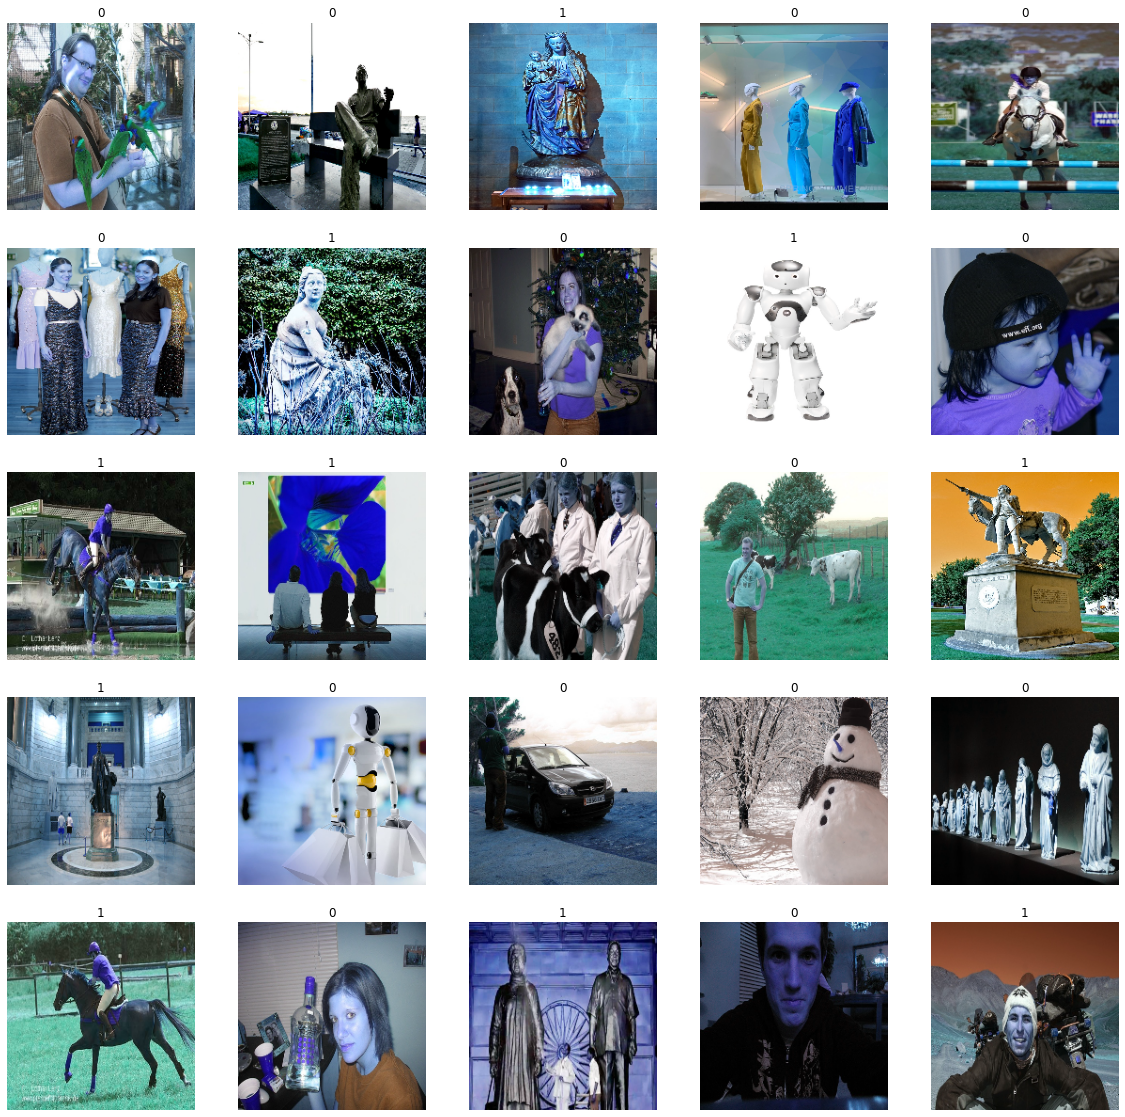

In [8]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(test_images),25))) : 
    plt.subplot(5,5,n+1)
    plt.imshow(test_images[i])  
    x = np.argmax(preds[i])
    plt.title(x)
    plt.axis('off')